In [ ]:
%pip install myqlm

# TRANSFORMADA QUÂNTICA DE FOURIER (QFT)

## Motivação

### Transformada de Fourier clássica



* Análise espectral;
* Resolução de equações diferenciais parciais;
* Ótica, difração e tomografia;
* Compressão de dados;
* Processamento de sinais.

Intuitivamente, a Transformada de Fourier deve ser útil em
algoritmos quânticos também, e será o tema de estudo de hoje.

### Aplicações da transformada de Fourier quântica

* Estimativa de fase
* Algoritmo de contagem
* Algoritmo de Shor
* HHL

## Definições

Base de Fourier

$\newcommand{\ket}[1]{\left| #1 \right\rangle}$
$\newcommand{\bra}[1]{\langle #1 \right|}$
$\newcommand{\im}[0]{\text{i}}$

\begin{align}
  \ket{F_P(\omega)} = \frac{1}{\sqrt P} \sum_{k=0}^{P - 1}
    e^{\im\omega k} \ket k,
\end{align}
onde $\omega \in \Omega_P = \left\{
  0, \frac{2\pi}{P}, \ldots, \frac{2\pi(P - 1)}{P}
\right\}$.

Exemplos:
para $P = 8$ e $\omega = 2\pi / 8$ temos
\begin{align}
  \ket{F_8\left(2\pi/8\right)} =
    \frac{1}{\sqrt 8} \left(
      \ket{0} + e^{\im 2\pi/8} \ket{1}
      + e^{\im 2 \cdot 2\pi/8} \ket{2}
      + \cdots
      + e^{\im 7 \cdot 2\pi/8} \ket{7}
    \right) .
\end{align}

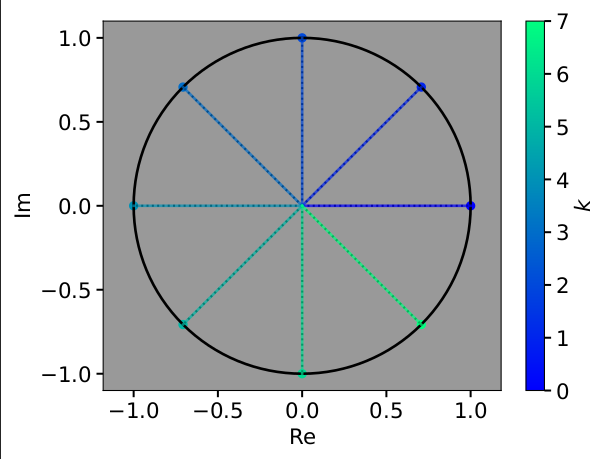

já para $P = 8$ e $\omega = 2 \cdot 2\pi/8$ temos
\begin{align}
  \ket{F_8\left(2 \cdot 2\pi/8\right)} =
    \frac{1}{\sqrt 8} \left(
      \ket{0} + e^{\im 2 \cdot 2\pi/8} \ket{1}
      + e^{\im 2 \cdot 2 \cdot 2\pi/8} \ket{2}
      + \cdots
      + e^{\im 7 \cdot 2 \cdot 2\pi/8} \ket{7}
    \right) .
\end{align}

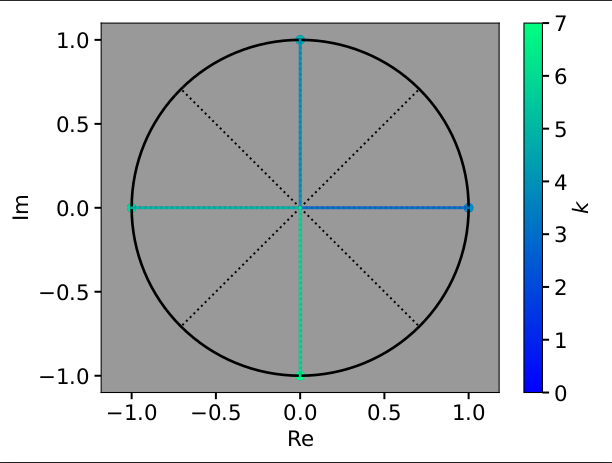

A vantagem dessa definição é que ela também está bem definida para ângulos que
não pertencem a $\Omega_P$.
Por exemplo, para $\ket{F_8\left(1.99 \cdot 2\pi/8\right)}$ temos

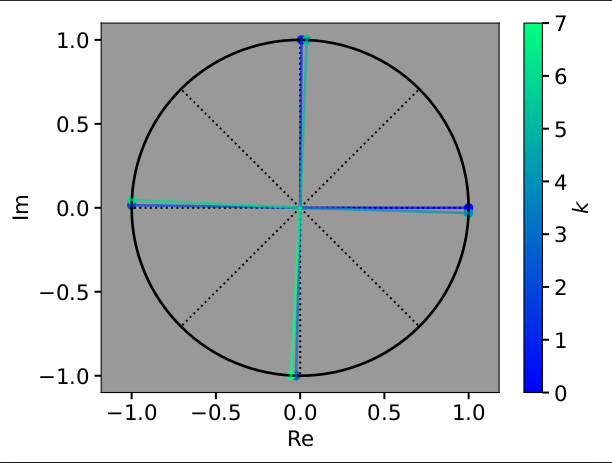

e para $\ket{F_8\left(1.5 \cdot 2\pi/8\right)}$ temos

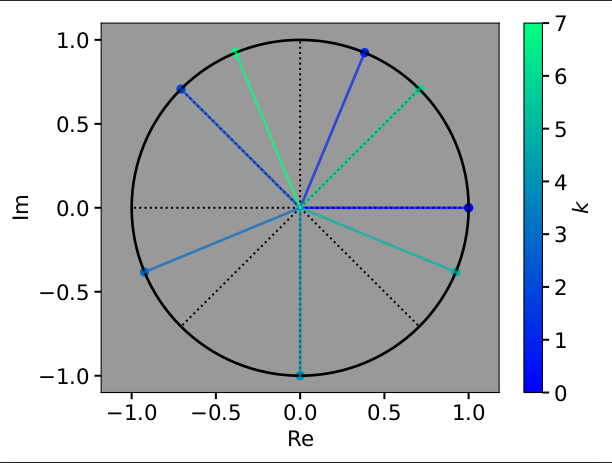

A transformada de Fourier Quântica é definida por
\begin{align}
  \text{QFT}_p \ket{j} = \ket{F_P\left(j \cdot 2\pi/P\right)},
\end{align}
onde $j$ é inteiro e $p = \log_2 P$ é a quantidade de qubits.
Já a transformada inversa de Fourier é dada por
\begin{align}
  \text{QFT}_p^\dagger \ket{F_P\left(j \cdot 2\pi/P\right)} = \ket{j}.
\end{align}

## Implementação

A implementação da transformada de Fourier é feita de maneira construtiva.
Vamos considerar o caso mais simples: $P = 2$.
Nesse caso, a base de Fourier é construída a partir de
$\Omega_2 = \{0, \pi\}$ e existem dois vetores na base:
\begin{align}
  \text{QFT}_1 \ket{0} = \ket{F_2(0)} &=
      \frac{\ket 0 + \ket 1}{\sqrt 2} = \ket{+} \quad \text{e}
  \\
  \text{QFT}_1 \ket{1} = \ket{F_2(\pi)} &=
      \frac{\ket 0 + e^{\im \pi} \ket 1}{\sqrt 2}
      = \frac{\ket 0 - \ket 1}{\sqrt 2} = \ket{-}.
\end{align}
Ou seja, podemos usar a matriz de Hadamard!
\begin{align}
  H = \frac 1{\sqrt 2}\begin{bmatrix}1 & 1 \\ 1 & -1\end{bmatrix} .
\end{align}

Vamos analisar o segundo caso mais simples: $P=4$.
a base é dada pelos vetores (usando a representação binária)
\begin{align}
  \text{QFT}_2 \ket{00} =
      \ket{F_4(0)} &\propto \ket{00} +\qquad \ \ket{01}
      + \qquad\ket{10} + \qquad \  \ket{11},\\
  \text{QFT}_2 \ket{01} =
      \ket{F_4(\pi/2)} &\propto \ket{00} + e^{\im \pi/2} \ \ket{01}
      + e^{\im \pi} \ \ \ \ket{10} + e^{\im 3 \pi/2} \  \ket{11},\\
  \text{QFT}_2 \ket{10} =
      \ket{F_4(\pi)} &\propto \ket{00} + e^{\im \pi} \quad \ket{01}
      + \qquad \ket{10} + e^{\im \pi} \quad \  \ket{11},\ \text e \\
  \text{QFT}_2 \ket{11} =
      \ket{F_4(3\pi/2)} &\propto \ket{00} + e^{\im 3\pi/2} \ket{01}
      + e^{\im \pi}\ \ \ket{10} + e^{\im \pi/2} \ \ \ \ket{11} .
\end{align}

Para construir o circuito com esse comportamento,
será necessário introduzir uma nova porta:
a porta de fase
\begin{align}
  PH(\theta) = \begin{bmatrix}
      1 & 0 \\ 0 & e^{\im \theta}
  \end{bmatrix}
\end{align}

In [ ]:
# importar bibliotecas
from qat.lang import *
import numpy as np

pi = np.pi
PH(pi).abstract_gate.matrix_generator(pi)

array([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j, -1.+1.2246468e-16j]])

In [ ]:
# construir rotina para QFT2
QFT2 = QRoutine()
fios = QFT2.new_wires(2)

# Fio 0
QFT2.apply(H, 0)
PH(pi/2).ctrl()(fios[1], fios[0])

# Fio 1
QFT2.apply(H, 1)

QFT2.display()

In [ ]:
# Simular o circuito para as 4 entradas possíveis
from qat.qpus import PyLinalg

linalgqpu = PyLinalg()

for entrada in range(4):
  # manipulacao de string
  entrada = bin(entrada)[2:].rjust(2, '0')
  print("Entrada: |" + str(entrada) + ">")

  prog = Program()
  qr = prog.qalloc(2)

  # mudar entrada do circuito
  for i in range(2):
    if entrada[i] == '1':
      prog.apply(X, qr[i])

  prog.apply(QFT2, qr)

  ### PORTA SWAP
  prog.apply(SWAP, qr)

  prog.display()

  job = prog.to_circ().to_job()
  result = linalgqpu.submit(job)
  for sample in result:
    fase = np.angle(sample.amplitude)
    # np.angle retorna um valor entre -pi e pi
    if fase < 0:
      fase += 2*pi
    print("Fase de " + str(sample.state) + ": " + str(fase/pi) + "pi")

  print("----------------------")

Entrada: |00>


Fase de |00>: 0.0pi
Fase de |01>: 0.0pi
Fase de |10>: 0.0pi
Fase de |11>: 0.0pi
----------------------
Entrada: |01>


Fase de |00>: 0.0pi
Fase de |01>: 0.5pi
Fase de |10>: 1.0pi
Fase de |11>: 1.5pi
----------------------
Entrada: |10>


Fase de |00>: 0.0pi
Fase de |01>: 1.0pi
Fase de |10>: 0.0pi
Fase de |11>: 1.0pi
----------------------
Entrada: |11>


Fase de |00>: 0.0pi
Fase de |01>: 1.5pi
Fase de |10>: 1.0pi
Fase de |11>: 0.5pi
----------------------


O circuito QFT2 (antes das aplicações da porta SWAP) será usado como base para
construção da transformada genérica.
Vamos agora construir a transformada para 3 qubits, i.e. QFT3.
Note que

\begin{align}
\text{QFT}_3 \ket{001} =
      \ket{F_8(\pi/4)} &\propto \ket{000}
      + e^{\im \pi/4} \ \ket{001}
      + e^{\im \pi/2} \ \ket{010}
      + \cdots
      + e^{\im \pi} \ \ket{100}
      + \cdots + e^{\im 7\pi/4} \  \ket{111}.
\end{align}

In [ ]:
# QFT 3
QFT3 = QRoutine()
fios = QFT3.new_wires(3)

# Fio 0
QFT3.apply(H, 0)
PH(pi/2).ctrl()(fios[1], fios[0])
PH(pi/4).ctrl()(fios[2], fios[0])

# Fio 1
QFT3.apply(QFT2, fios[1:])

QFT3.display()

Entratando, ao executar esse circuito, vemos que teremos que contornar o problema de troca novamente.

In [ ]:
# Simular o circuito para as 4 entradas possíveis
# Simular o circuito para as 4 entradas possíveis
from qat.qpus import PyLinalg

linalgqpu = PyLinalg()

for entrada in range(8):
  # manipulacao de string
  entrada = bin(entrada)[2:].rjust(3, '0')
  print("Entrada: |" + str(entrada) + ">")

  prog = Program()
  qr = prog.qalloc(3)

  # mudar entrada do circuito
  for i in range(3):
    if entrada[i] == '1':
      prog.apply(X, qr[i])

  prog.apply(QFT3, qr)

  ### PORTA SWAP
  prog.apply(SWAP, qr[0], qr[2])

  prog.display()

  job = prog.to_circ().to_job()
  result = linalgqpu.submit(job)
  for sample in result:
    fase = np.angle(sample.amplitude)
    # np.angle retorna um valor entre -pi e pi
    if fase < 0:
      fase += 2*pi
    print("Fase de " + str(sample.state) + ": " + str(fase/pi) + "pi")

  print("----------------------")

Entrada: |000>


Fase de |000>: 0.0pi
Fase de |001>: 0.0pi
Fase de |010>: 0.0pi
Fase de |011>: 0.0pi
Fase de |100>: 0.0pi
Fase de |101>: 0.0pi
Fase de |110>: 0.0pi
Fase de |111>: 0.0pi
----------------------
Entrada: |001>


Fase de |000>: 0.0pi
Fase de |001>: 0.25pi
Fase de |010>: 0.5pi
Fase de |011>: 0.75pi
Fase de |100>: 1.0pi
Fase de |101>: 1.25pi
Fase de |110>: 1.5pi
Fase de |111>: 1.75pi
----------------------
Entrada: |010>


Fase de |000>: 0.0pi
Fase de |001>: 0.5pi
Fase de |010>: 1.0pi
Fase de |011>: 1.5pi
Fase de |100>: 0.0pi
Fase de |101>: 0.5pi
Fase de |110>: 1.0pi
Fase de |111>: 1.5pi
----------------------
Entrada: |011>


Fase de |000>: 0.0pi
Fase de |001>: 0.75pi
Fase de |010>: 1.5pi
Fase de |011>: 0.24999999999999997pi
Fase de |100>: 1.0pi
Fase de |101>: 1.75pi
Fase de |110>: 0.5pi
Fase de |111>: 1.25pi
----------------------
Entrada: |100>


Fase de |000>: 0.0pi
Fase de |001>: 1.0pi
Fase de |010>: 0.0pi
Fase de |011>: 1.0pi
Fase de |100>: 0.0pi
Fase de |101>: 1.0pi
Fase de |110>: 0.0pi
Fase de |111>: 1.0pi
----------------------
Entrada: |101>


Fase de |000>: 0.0pi
Fase de |001>: 1.25pi
Fase de |010>: 0.5pi
Fase de |011>: 1.75pi
Fase de |100>: 1.0pi
Fase de |101>: 0.25pi
Fase de |110>: 1.5pi
Fase de |111>: 0.75pi
----------------------
Entrada: |110>


Fase de |000>: 0.0pi
Fase de |001>: 1.5pi
Fase de |010>: 1.0pi
Fase de |011>: 0.5pi
Fase de |100>: 0.0pi
Fase de |101>: 1.5pi
Fase de |110>: 1.0pi
Fase de |111>: 0.5pi
----------------------
Entrada: |111>


Fase de |000>: 0.0pi
Fase de |001>: 1.75pi
Fase de |010>: 1.5pi
Fase de |011>: 1.25pi
Fase de |100>: 1.0pi
Fase de |101>: 0.75pi
Fase de |110>: 0.5pi
Fase de |111>: 0.24999999999999997pi
----------------------


A troca necessária é apenas uma nova SWAP entre os qubits 0 e 2.

In [ ]:
# adicionar porta SWAP

A generalização da transformada de Fourier para $p$ qubits está representada na imagem a seguir.

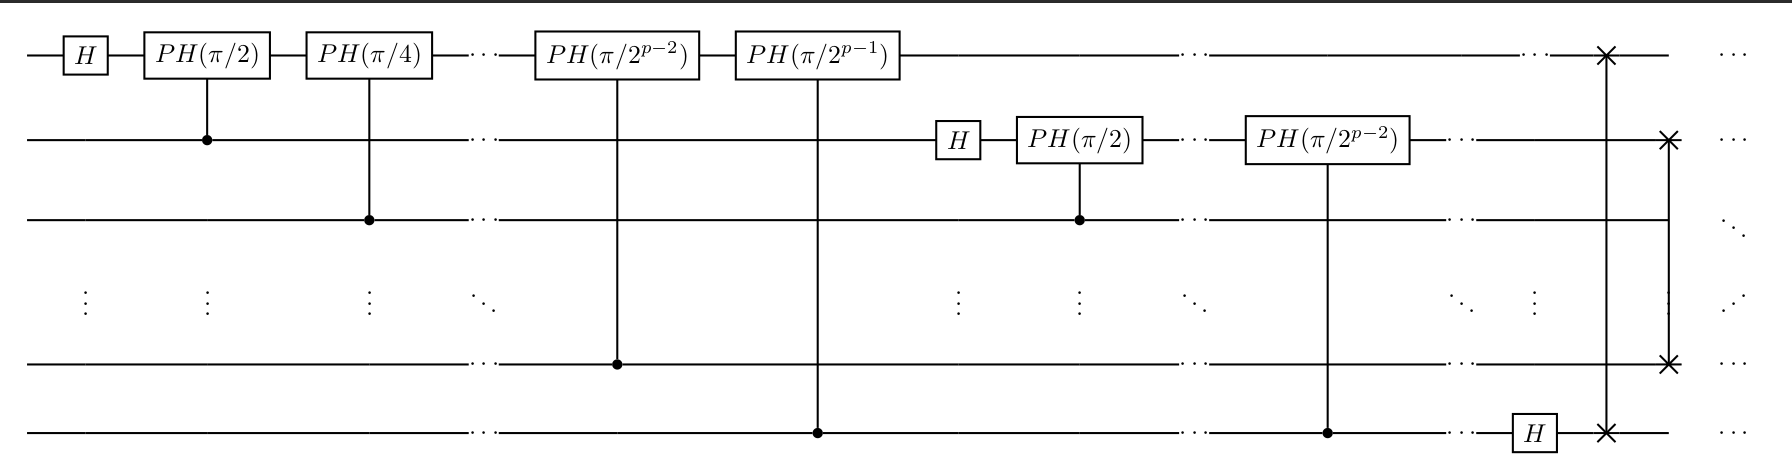

O myQLM tem a QFT geral já implementada,
porém **sem** as portas SWAP.

In [ ]:
# Código da QFT do myQLM
from qat.lang.AQASM.qftarith import QFT

In [ ]:
QFT(3).display()

### Exercício
Construa o circuito da transformada Quântica de Fourier geral e
verifique se os resultados coincidem com o circuito de
`qat.lang.AQASM.qftarith.QFT`.

# Estimativa de Fase

Vamos ver um exemplo de aplicação da transformada de Fourier num algoritmo
bastante utilizado: a estimativa de fase.

O problema de estimativa de fase consiste no seguinte.
Dado um autovetor $\ket\lambda$ de uma matriz unitária $U$,
estimar a fase do respectivo autovalor $e^{\im2\pi\lambda}$ onde $\lambda$ tem
representação binária $0.\lambda_1 \lambda_2 \lambda_3\ldots$.
A ideia é codificar $\lambda$ nas fases de vetores da base computacional e
então aplicar a transformada inversa de Fourier,
obtendo todos os dígitos **depois do ponto**.
Por exemplo, se $\lambda = 0.01$ (binário para 1/4),
ao aplicar a transformada inversa de Fourier,
espera-se obter o estado $\ket{0100\ldots}$.


In [ ]:
# construir matriz U personalizada
def gerador_da_matriz():
  eigvals = [np.exp(1j*theta) for theta in [0, pi/8, 2*pi/8, 3.5*pi/8]]
  U = np.diag(eigvals)
  return U

U = gerador_da_matriz()
U

array([[1.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.92387953+0.38268343j,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.70710678+0.70710678j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.19509032+0.98078528j]])

In [ ]:
U @ [0, 0, 1, 0]

array([0.        +0.j        , 0.        +0.j        ,
       0.70710678+0.70710678j, 0.        +0.j        ])

In [ ]:
from qat.lang.AQASM.gates import ParamGate

# construir porta para matriz U
# parametros: (nome, quantidade de parametros, funcao geradora)
abstract_U = AbstractGate("Porta U", [],
                          matrix_generator=gerador_da_matriz)

# paramentros: porta abstrata, arity (qtd. de qubits)
porta_U = ParamGate(abstract_U, 2)

# exibir circuito
rotina_U = QRoutine()
fios = rotina_U.new_wires(porta_U.arity)
rotina_U.apply(porta_U, fios)
rotina_U.display()

In [ ]:
# Simular o circuito para os 4 autovetores
# Simular o circuito para as 4 entradas possíveis
from qat.qpus import PyLinalg

linalgqpu = PyLinalg()

for entrada in range(4):
  # manipulacao de string
  entrada = bin(entrada)[2:].rjust(2, '0')
  print("Entrada: |" + str(entrada) + ">")

  prog = Program()
  qr = prog.qalloc(2)

  # mudar entrada do circuito
  for i in range(2):
    if entrada[i] == '1':
      prog.apply(X, qr[i])

  prog.apply(rotina_U, qr)

  job = prog.to_circ().to_job()
  result = linalgqpu.submit(job)
  for sample in result:
    fase = np.angle(sample.amplitude)
    # np.angle retorna um valor entre -pi e pi
    if fase < 0:
      fase += 2*pi
    print("Fase de " + str(sample.state) + ": " + str(fase/pi) + "pi")

  print("----------------------")

Entrada: |00>
Fase de |00>: 0.0pi
----------------------
Entrada: |01>
Fase de |01>: 0.12500000000000003pi
----------------------
Entrada: |10>
Fase de |10>: 0.25pi
----------------------
Entrada: |11>
Fase de |11>: 0.4375pi
----------------------


Para o algoritmo de estimativa de fase, será necessário implementar um circuito que calcule as potências controladas de uma matriz $U$:
\begin{align}
    \ket{j}\ket \psi \to \ket j U^j \ket \psi.
\end{align}
Isso pode ser facilmente implementado considerando a representação binária de $j$.
Por exemplo, se $j = 1010$,
então $U^j = U^{1 \cdot 2^3}U^{0\cdot 2^2}U^{1 \cdot 2^1}U^{0 \cdot 2^0}$.
Então a potência controlada pode ser implementada utilizando várias operações controladas seguidas: uma para cada potência de 2.

Serão utilizados 2 registradores: um correspondente com as dimensões de $U$ e outro com $p = \log_2 P$ qubits correspondente à quantidade de bits de *precisão* desejados.

In [ ]:
# construir circuito de potências controladas
def potencia_controlada(porta, p):
  # p eh a qtd de qubits no primeiro registrador
  pot_ctrl = QRoutine()
  fios = pot_ctrl.new_wires(p + porta.arity)

  alvos = list(range(p, p + porta.arity))
  for i in range(p):
    for j in range(2**i):
      pot_ctrl.apply(porta.ctrl(), p-1-i, alvos)

  return pot_ctrl

In [ ]:
potencia_controlada(porta_U, 3).display()

In [ ]:
# Construir rotina final da estimativa de fase
def estimativa_de_fase(porta, p):
  est_fase = QRoutine()
  pot_ctrl = potencia_controlada(porta, p)
  fios = est_fase.new_wires(pot_ctrl.arity)

  # aplicar a transformada de Fourier
  for i in range(p):
    est_fase.apply(H, i)

  # potencia controlada
  est_fase.apply(pot_ctrl, fios)

  # aplicar a transformada de Fourier inversa no primeiro reg
  for i in range(0, p//2):
    est_fase.apply(SWAP, i, p - 1 - i)
  est_fase.apply(QFT(p).dag(), fios[:p])

  return est_fase

In [ ]:
estimativa_de_fase(porta_U, 2).display()

In [ ]:
import matplotlib.pyplot as plt

# plota a distribuição de probabilidade dos estados do primeiro registrador
# dado que a entrada do segundo registrador foi um autovetor
def plot_probs(results, p):
  labels = [bin(i)[2:].rjust(p, '0') for i in range(2**p)]
  probs = [0] * 2**p
  for sample in results:
    probs[int(str(sample.state)[1:p+1], 2)] = sample.probability

  plt.xticks(rotation=60)
  plt.xlabel("Estado")
  plt.ylabel("Probabilidade")
  plt.bar(labels, probs)
  plt.show()

Entrada: |000000>


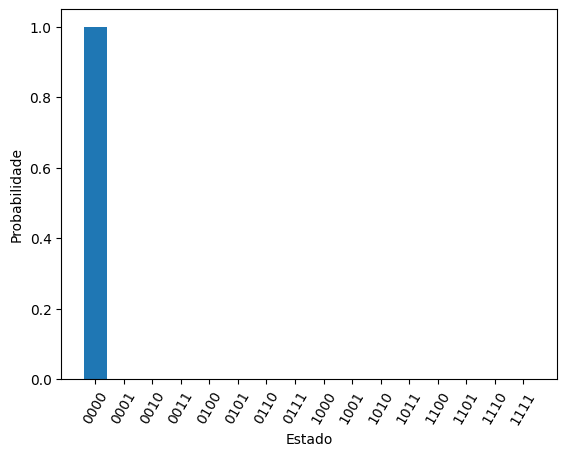

-----------------------------------
Entrada: |000001>


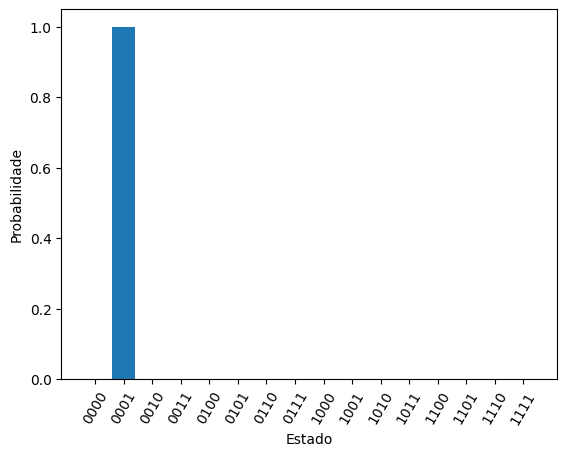

-----------------------------------
Entrada: |000010>


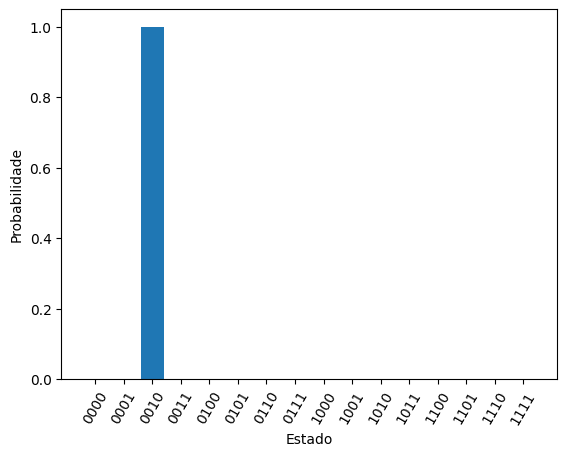

-----------------------------------
Entrada: |000011>


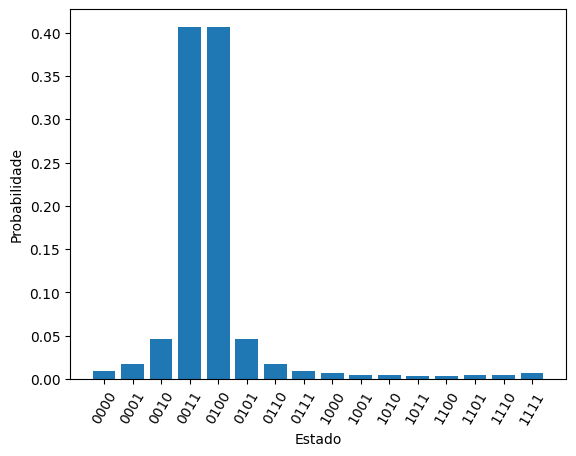

-----------------------------------


In [ ]:
# Simular estimativa de fase para 4 autovetores

# Create a Quantum Processor Unit
linalgqpu = PyLinalg()

p = 4
rotina_est_fase = estimativa_de_fase(porta_U, p)

for entrada in range(2**porta_U.arity):

  prog = Program()
  qr = prog.qalloc(rotina_est_fase.arity)

  # manipulação de strings para mostrar toda a entrada
  entrada = bin(entrada)[2:].rjust(porta_U.arity, '0')
  print("Entrada: |" + '0'*p + str(entrada) + ">")

  # mudando a entrada do segundo registrador
  for i in range(porta_U.arity):
    if entrada[i] == '1':
      prog.apply(X, qr[-porta_U.arity + i])

  prog.apply(rotina_est_fase, qr)

  job = prog.to_circ().to_job()
  result = linalgqpu.submit(job)
  plot_probs(result, p)
  # for sample in result:
  #   print("Prob de " + str(sample.state) + ": " + str(sample.probability))

  print('-----------------------------------')

### Exercício
Mostrar que a saída de $\text{QFT}_n \ket{0 \ldots 0}$ é igual à de $H^{\otimes n} \ket{0 \ldots 0}$.